<a href="https://colab.research.google.com/github/yenlung/AI-Demo/blob/master/%E3%80%90Demo02%E3%80%91%E9%81%B7%E7%A7%BB%E5%BC%8F%E5%AD%B8%E7%BF%92%E5%81%9A%E5%85%AB%E5%93%A5%E8%BE%A8%E8%AD%98%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** 請先做完以下的基本設定 ***

用 Colab 打開後, 登入 Google 帳號 (如果還沒有登入) 請在「檔案」選「在雲端硬碟中儲存副本」, 檔名請自取, 副檔名保留 .ipynb 即可。這樣這個程式才完全屬於你的。

In [1]:
# 辨識類別 (請用英文、無空格)
category_en = "crested_myna,javan_myna,common_myna"

# 辨識類別的中文, 顯示時用的名稱
category_zh = "土八哥,白尾八哥,家八哥"

# APP 的名稱, 可自由更改
title = "八哥辨識器"

# APP 的說明, 可自由更改
description="請輸入一張八哥照片, 我會告訴你是什麼八哥!"

台灣最常見的八哥有 (土) 八哥、白尾八哥及家八哥三種。我們來挑戰三種八哥總共用不到三十張照片, 看能不能打造一個神經網路學會辨識這三種八哥。

### 1. 安裝和讀入需要的套件

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s et

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
import os
import zipfile
import PIL.Image as Image
import gradio as gr

### 2. 創建資料夾

In [6]:
categories = category_en.split(',')
labels = category_zh.split(',')

In [7]:
# 辨識有幾類

N = len(categories)

In [8]:
base_dir = '/content/'

In [9]:
for category in categories:
    os.makedirs(f'./{category}', exist_ok=True)

*** 請開始在每個類別的資料夾下，放入若干照片 ***

這裡是為了方便, 讀入我們預先準備好的三種八哥照片。做自己的分類問題不需要執行。

In [10]:
!wget --no-check-certificate \
    https://github.com/yenlung/AI-Demo/raw/master/myna.zip \
    -O /content/myna.zip

--2024-07-10 07:56:12--  https://github.com/yenlung/AI-Demo/raw/master/myna.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/AI-Demo/master/myna.zip [following]
--2024-07-10 07:56:12--  https://raw.githubusercontent.com/yenlung/AI-Demo/master/myna.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448092 (438K) [application/zip]
Saving to: ‘/content/myna.zip’

/content/myna.zip   100%[===================>] 437.59K  --.-KB/s    in 0.03s   

2024-07-10 07:56:12 (16.7 MB/s) - ‘/content/myna.zip’ saved [448092/448092]



In [11]:
local_zip = '/content/myna.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

我們可以列出在某個資料夾的檔名! 比方說（土）八哥是這樣。

In [12]:
thedir = base_dir + categories[0]
os.listdir(thedir)

['crested_myna01.jpg',
 'crested_myna09.jpg',
 'crested_myna07.jpg',
 'crested_myna02.jpg',
 'crested_myna05.jpg',
 'crested_myna03.jpg',
 'crested_myna06.jpg',
 'crested_myna04.jpg',
 'crested_myna08.jpg']

接下來，我們要將這三個資料夾底下的照片作成輸入 (data)、輸出 (target)。

In [13]:
data = []
target = []
for i in range(N):
    thedir = base_dir + categories[i]
    file_names = os.listdir(thedir)
    for fname in file_names:
        img_path = thedir + '/' + fname
        img = load_img(img_path , target_size = (224,224))
        x = img_to_array(img)
        data.append(x)
        target.append(i)

In [14]:
data = np.array(data)

順便看一下我們總共有多少張圖片

In [15]:
data.shape

(48, 224, 224, 3)

接著，隨便挑一張照片來看看它是什麼「鳥」樣

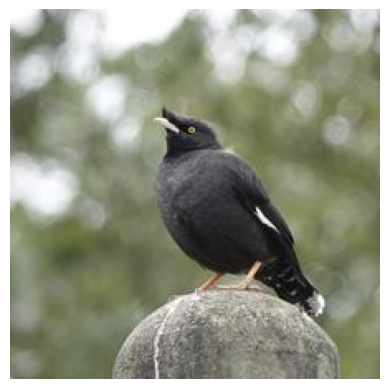

In [16]:
n = 1
plt.imshow(data[n]/255)
plt.axis('off');

看來沒有什麼意外, 就是個鳥圖。我們用 ResNet 的預處理再看一次。

In [17]:
x_train = preprocess_input(data)

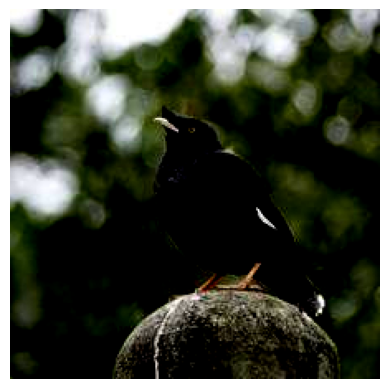

In [18]:
plt.imshow(x_train[n])
plt.axis('off');

這邊會跳出一個小小的警告，這是因為 ResNet 的預處理會將圖片的數據範圍常規化到 [-1, 1] 之間，與我們之前常規化到 [0, 1] 之間差一點點，所以畫圖時，matplotlib會自動作一些調整

每張圖的答案就是 0, 1, 2 其中一個數字。

In [19]:
target[n]

0

做 one-hot enconding。

In [20]:
y_train = to_categorical(target, N)

In [21]:
y_train[0]

array([1., 0., 0.], dtype=float32)

### 3. 用 ResNet50 打造我們的神經網路

ResNet50 是 2015 ImageNet 的冠軍, 我們用第二版來試試。原本 ImageNet 是做了 1,000 個類別的圖形辨識。我們想直接用來辨識八哥, 就是把最後一層 (通常就 1,000 個輸出的 dense 層) 砍掉 (`include_top=False`), 然後換我們的就好。

再來我們可以把每個 filter 的結果做個大總合, 例如算每個 filter 計分板的總平均 (global average pooling), 這本來該我們自己做, 但是 `tf.Keras` 是善良無比的幫我們做好。只要下個參數 `pooling="avg"`)。

In [22]:
resnet = ResNet50V2(include_top=False, pooling="avg")

94668760/94668760 [==============================] - 1s 0us/step


再來就是正式打造我們遷移學習版的函數學習機! 可以發現我們只是加入了最後一層...

In [23]:
model = Sequential()

In [24]:
model.add(resnet)

In [25]:
model.add(Dense(N, activation='softmax'))

我們是遷移式學習, 原本 ResNet 的部份我們當然沒有重新訓練的意思。於是就設這邊不需要訓練。

In [26]:
resnet.trainable = False

#### 欣賞我們的神經網路

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23570947 (89.92 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


#### 組裝我們的函數學習機

這裡我們用分類時非常標準的 `categorical_crossentropy`, 順便試試有名的 `adam` 學習法。

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

我們可以發現原來有超過兩千萬個參數, 經我們偷來, 不是, 借來以後, 只有 6,147 個參數要調。

### 4. 訓練 fit

In [29]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5/5 [==============================] - 8s 348ms/step - loss: 1.2232 - accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 0.8251 - accuracy: 0.7083
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 0.5838 - accuracy: 0.7917
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 0.4174 - accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 0s 34ms/step - loss: 0.3174 - accuracy: 0.9375
Epoch 6/10
5/5 [==============================] - 0s 32ms/step - loss: 0.2433 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1884 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1530 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1283 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1115 - accuracy: 1.0000


### 5. 預測

我們先用 model.evaluate 看一下模型表現得如何

In [30]:
loss, acc = model.evaluate(x_train, y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

2/2 [==============================] - 5s 2s/step - loss: 0.1015 - accuracy: 1.0000
Loss: 0.10148635506629944
Accuracy: 1.0


In [31]:
y_predict = np.argmax(model.predict(x_train), -1)

2/2 [==============================] - 1s 75ms/step


In [32]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

好奇的話比較一下正確答案。

In [33]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### 6. 用 `gradio` 打造八哥辨識 web app!

In [34]:
def resize_image(inp):
    # 將 NumPy array 轉換成 PIL Image 對象
    img = Image.fromarray(inp)

    # 將圖片調整為 224x224 像素
    img_resized = img.resize((224, 224), Image.Resampling.LANCZOS)

    # 將調整大小後的圖片轉換回 NumPy array
    img_array = np.array(img_resized)

    return img_array

In [35]:
def classify_image(inp):
    img_array = resize_image(inp)
    inp = img_array.reshape((1, 224, 224, 3))
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(N)}

In [36]:
image = gr.Image(label="八哥照片")
label = gr.Label(num_top_classes=N, label="AI辨識結果")

我們將八哥數據庫中的圖片拿出來當作範例圖片讓使用者使用

In [38]:
sample_images = []
for i in range(N):
    thedir = base_dir + categories[i]
    for fname in os.listdir(thedir):
        sample_images.append(categories[i] + '/' + fname)

最後，將所有東西組裝在一起，就大功告成了！

In [ ]:
gr.Interface(fn=classify_image,
             inputs=image,
             outputs=label,
             title=title,
             description=description,
             examples=sample_images).launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4e06c48aa973cfd431.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 1s 1s/step
